<a href="https://colab.research.google.com/github/andreiamferreira/image-processing-course/blob/main/Prova_pratica_procimg_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Andréia Martins Ferreira

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


## **Questão 1:**

a) Plote, a imagem original e a imgem filtrada, uma ao lado da outra.


Text(0.5, 1.0, 'Imagem Filtrada')

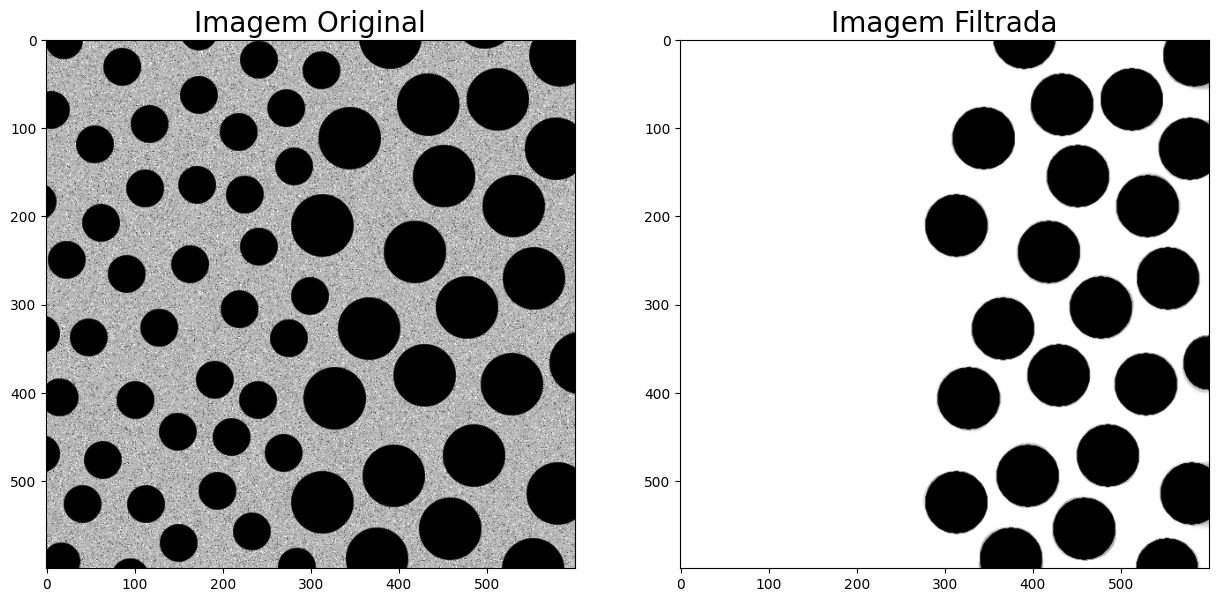

In [ ]:
#leitura da imagem
imagem_q1 = cv2.imread('/content/gdrive/MyDrive/Intro. Processamento de Imagens Digitais/prova/Fig0943(a)(dark_blobs_on_light_background).tif')

# normalização da imagem
img_array_q1 = np.array(imagem_q1)
img_normalizada_q1 = (img_array_q1 - img_array_q1.min())/(img_array_q1.max()-img_array_q1.min())

# kernel a ser utilizado: em formato de elipse (filtragem de discos)
N = 55
KR= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N))

#Fechamento da imgem: dilatação seguida por erosão, utilizando o mesmo kernel em ambas as operações.
img_dilatada_q1 = cv2.dilate(img_normalizada_q1, KR, iterations=1)
img_erodida_q1 = cv2.erode(img_dilatada_q1, KR, iterations=1)

# plotagem das imagens
plt.figure(figsize=[15,10]);
plt.subplot(1,2,1);plt.imshow(img_normalizada_q1, cmap='gray');plt.title('Imagem Original',size=20);
plt.subplot(1,2,2);plt.imshow(img_erodida_q1, cmap='gray');plt.title('Imagem Filtrada',size=20)


*1.b) Comprove que o tamanho dos discos obtidos do resultado de sua filtragem (discos maiores), estarão do mesmo tamanho dos discos da imagem original. Discuta qualitativamente o resultado da sua filtragem.*

**R**: A diferença de tamanho pode ser dada através da subtração da imagem original, da imagem filtrada. Caso o tamanho tenha sido mantido, não há diferenças nas formas, e o retorno é uma imagem preta, como pode ser visto abaixo. Como foi feito um fechamento (dilatação seguida por erosão), o mesmo kernel foi utilizado para ambas as operações, não alterando o tamanho (algo comum em operações morfológicas já que, a dilatação tende a 'engrossar' imagens, e a erosão tende a 'afinar').

Em relação ao resultado qualitativo da imagem, os discos médios foram filtrados da imgem, sobrando apenas os discos maiores, no lado direito da imagem. Além dos discos médios, o ruído no fundo da imagem também foi filtrado junto.

Text(0.5, 1.0, 'Prova real de tamanho')

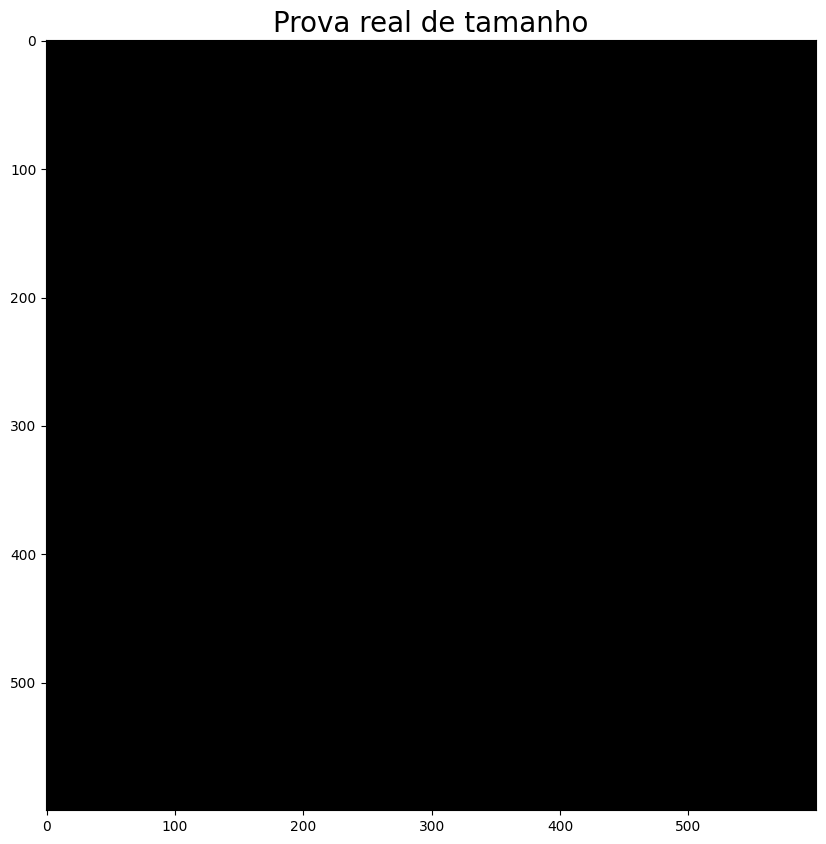

In [ ]:
diferenca_fechamento = img_normalizada_q1 - img_erodida_q1
plt.figure(figsize=[10,10]);
plt.subplot(1,1,1);plt.imshow(diferenca_fechamento, cmap='gray');plt.title('Prova real de tamanho',size=20)


## **Questão 2**

Utilizando técnicas de filtragem no domínio do espaço (convolução 2D e máscaras/filtros estudados), execute a detecção de borda dos elementos de circuito da imagem.


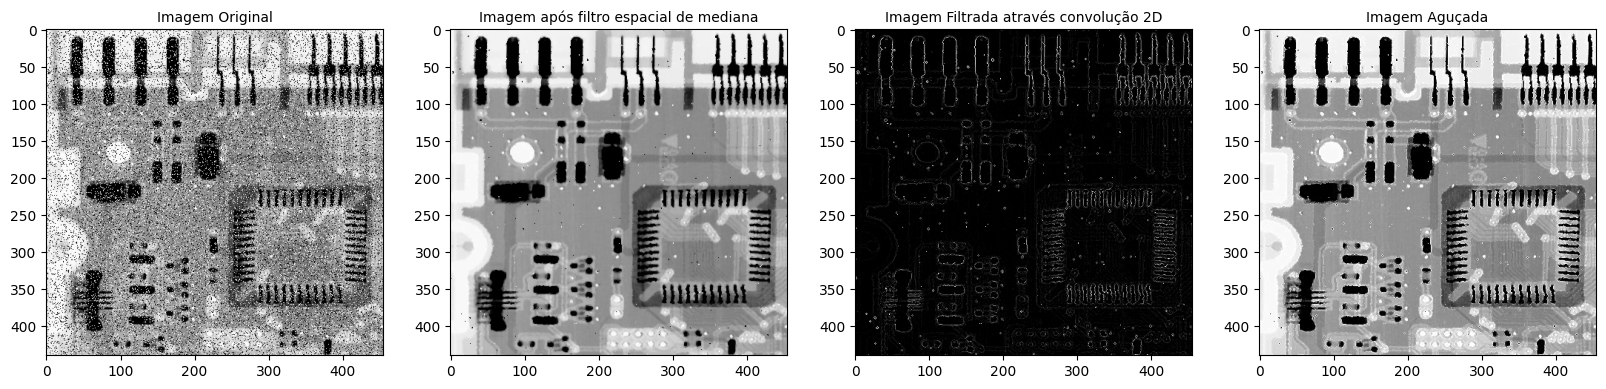

In [ ]:
# Questão 2
imagem_q2 = cv2.imread('/content/gdrive/MyDrive/Intro. Processamento de Imagens Digitais/prova/Fig0335(a)(ckt_board_saltpep_prob_pt05).tif')

img_ = cv2.cvtColor(imagem_q2, cv2.COLOR_BGR2GRAY) #converte P&B

kernel_q2 = np.array([[0.0, -1.0, 0.0],
                  [-1.0, 4.0, -1.0],
                  [0.0, -1.0, 0.0]])

# mediana para diminuir o ruido salt and pepper
median = cv2.medianBlur(img_, 3)

#filtrar por convolução 2D
img_filtrada = cv2.filter2D(median,-1,kernel_q2)

agucamento=cv2.add(median,img_filtrada)

# plotagem das imagens
plt.figure(figsize=[20,15]);
plt.subplot(1,4,1);plt.imshow(img_, cmap='gray');plt.title('Imagem Original',size=10);
plt.subplot(1,4,2);plt.imshow(median, cmap='gray');plt.title('Imagem após filtro espacial de mediana',size=10);
plt.subplot(1,4,3);plt.imshow(img_filtrada, cmap='gray');plt.title('Imagem Filtrada através convolução 2D',size=10);
plt.subplot(1,4,4);plt.imshow(agucamento, cmap='gray');plt.title('Imagem Aguçada',size=10);



*Discuta qualitativamenteo o resultado da filtragem*

**R:** A imagem aguçada (foco nas bordas) conseguiu detectar as bordas da imagem, bem como alguns detalhes. Os pinos do componentes maior, na direita, por exemplo, estão mais claros, e os tubos de conexão no canto superior esquerdo também estão mais nítidos. Foi necessário adicionar o filtro espacial da mediana, para diminuir o ruído salt and pepper, e melhorar a detecção das bordas. Na imagem 3, as bordas ficam expostas com maior clareza, e ao adicionar ela à imagem filtrada por mediana, aumenta a nitidez da imagem original, ao delimitar as bordas.